## Data Manipulation

In [77]:
import csv
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
# read .dat to a list of lists
datContent = [i.strip().split() for i in open("/Users/sahilagrawal/Desktop/OR_CASE/Krackhardt dataset/krackad.dat").readlines()]

# Create 21 x 21 x 21 array
flat_data = np.array(datContent[26:])
data = np.reshape(flat_data, (21, 21, 21)).astype(int)

data.shape

(21, 21, 21)

## Aggregation Methods

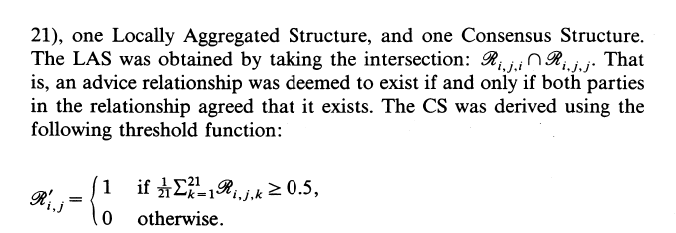

In [78]:
def consensus_structure(array):    
    return array.mean(axis=0).round()

def locally_aggregated_structures(array):
    las_array = np.zeros((21,21))

    for p1 in range(21):
        for p2 in range(21):
            if array[p1, p1, p2] == 1 and array[p2, p1, p2] == 1:
                las_array[p1, p2] = 1         
    return las_array

In [79]:
def plot_network(array):
    G = nx.DiGraph()
    G.add_nodes_from(range(1, 22))

    edges = np.argwhere(array>0) + 1
    G.add_edges_from(edges)
    return G

## Network Plots

In [80]:
plt.rcParams["figure.figsize"] = (12,8)

### Consensus Structure (CS)

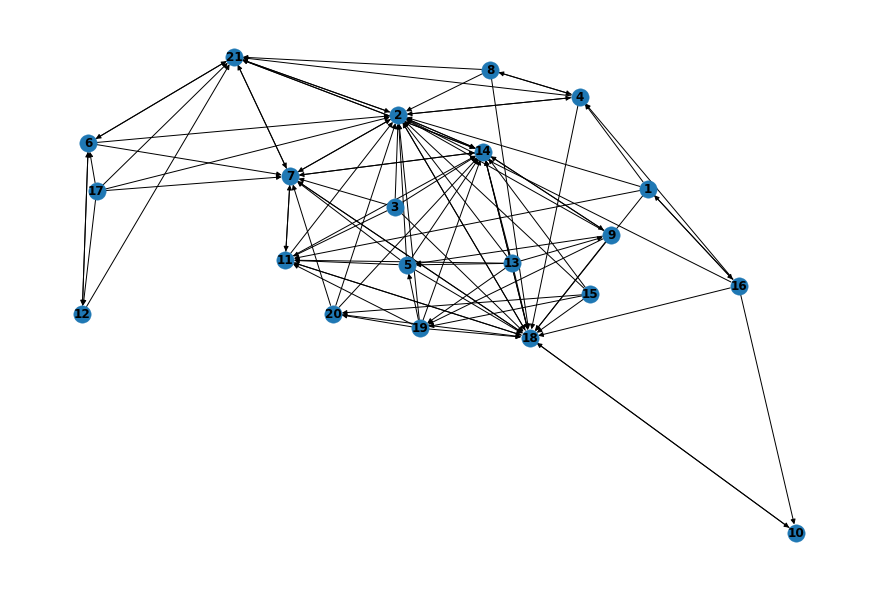

In [130]:
data_cons = consensus_structure(data)

G_cs = plot_network(data_cons)

nx.draw(G_cs, with_labels=True, font_weight='bold')

In [82]:
import operator

betweenness_dict = nx.betweenness_centrality(G_cs) # Run betweenness 
nx.set_node_attributes(G_cs, betweenness_dict, 'betweenness')

sorted_betweenness = sorted(betweenness_dict.items(), key=operator.itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness :")
for b in sorted_betweenness[:20]:
    print(b)

    

Top 20 nodes by betweenness :
(14, 0.20508771929824562)
(2, 0.1675438596491228)
(21, 0.13166666666666665)
(9, 0.12894736842105262)
(18, 0.11894736842105262)
(4, 0.05789473684210526)
(6, 0.05605263157894737)
(19, 0.052192982456140354)
(7, 0.048157894736842115)
(11, 0.006228070175438596)
(5, 0.0024999999999999996)
(1, 0.0013157894736842105)
(16, 0.0013157894736842105)
(20, 0.0010964912280701754)
(3, 0.0)
(8, 0.0)
(10, 0.0)
(12, 0.0)
(13, 0.0)
(15, 0.0)


In [83]:
df_cs = pd.DataFrame([], index=range(1, 22))
df_cs['CS Out Degree'] = pd.Series(dict(G_cs.out_degree()))
df_cs['CS In Degree'] = pd.Series(dict(G_cs.in_degree()))

df_cs

,CS Out Degree,CS In Degree
1,5,1
2,5,18
3,5,0
4,4,4
5,5,3
6,4,3
7,5,10
8,4,1
9,5,2
10,1,2


### Locally Aggregated Structure (LAS) 

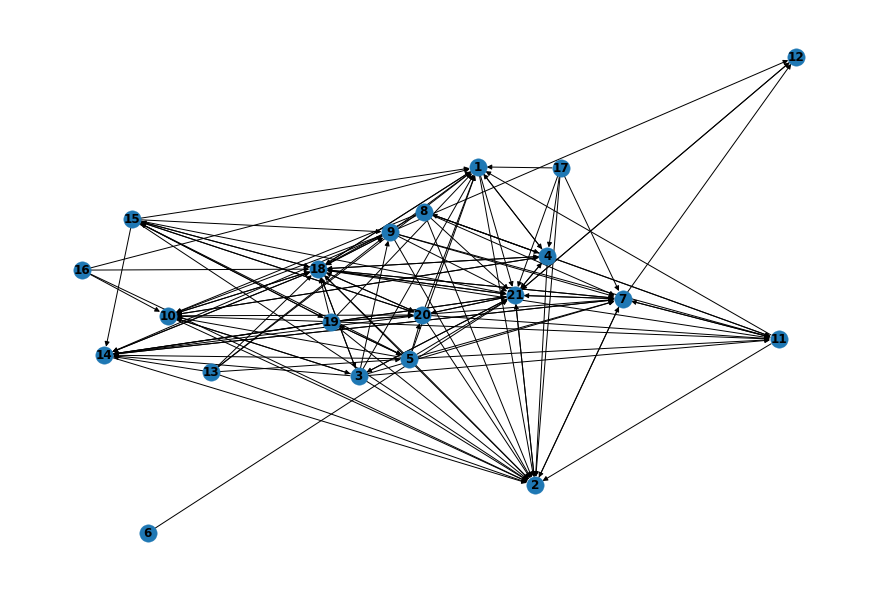

In [84]:
data_las = locally_aggregated_structures(data)

G_las = plot_network(data_las)

nx.draw(G_las, with_labels=True, font_weight='bold')

In [135]:
import operator

betweenness_dict = nx.betweenness_centrality(G_cs) # Run betweenness 
nx.set_node_attributes(G_cs, betweenness_dict, 'betweenness')

sorted_betweenness = sorted(betweenness_dict.items(), key=operator.itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness :")
for b in sorted_betweenness[:20]:
    print(b)

    

Top 20 nodes by betweenness :
(14, 0.20508771929824562)
(2, 0.1675438596491228)
(21, 0.13166666666666665)
(9, 0.12894736842105262)
(18, 0.11894736842105262)
(4, 0.05789473684210526)
(6, 0.05605263157894737)
(19, 0.052192982456140354)
(7, 0.048157894736842115)
(11, 0.006228070175438596)
(5, 0.0024999999999999996)
(1, 0.0013157894736842105)
(16, 0.0013157894736842105)
(20, 0.0010964912280701754)
(3, 0.0)
(8, 0.0)
(10, 0.0)
(12, 0.0)
(13, 0.0)
(15, 0.0)


In [86]:
df_las = pd.DataFrame([], index=range(1, 22))
df_las['LAS Out Degree'] = pd.Series(dict(G_las.out_degree()))
df_las['LAS In Degree'] = pd.Series(dict(G_las.in_degree()))

df_las

,LAS Out Degree,LAS In Degree
1,4,12
2,2,18
3,9,3
4,7,6
5,10,3
6,1,0
7,6,11
8,7,1
9,9,4
10,5,8


### Summary of Node Degrees 

In [87]:
network_degrees = df_cs.merge(df_las,
                              left_index=True, 
                              right_index=True)
network_degrees

,CS Out Degree,CS In Degree,LAS Out Degree,LAS In Degree
1,5,1,4,12
2,5,18,2,18
3,5,0,9,3
4,4,4,7,6
5,5,3,10,3
6,4,3,1,0
7,5,10,6,11
8,4,1,7,1
9,5,2,9,4
10,1,2,5,8


Advanced NetworkX: Community detection with modularity

In [102]:
# greedy Newman based model based on modularity
G_las_und=G_las.to_undirected()

In [154]:
from networkx.algorithms import community
communities = community.greedy_modularity_communities(G_las)# number of communities appropriate 
node_groups = []
for com in (communities):
    node_groups.append(list(com))
    
node_groups


[[1, 3, 4, 8, 9, 10, 11, 13, 16, 18],
 [17, 2, 21, 6, 7, 12, 14],
 [19, 20, 5, 15]]

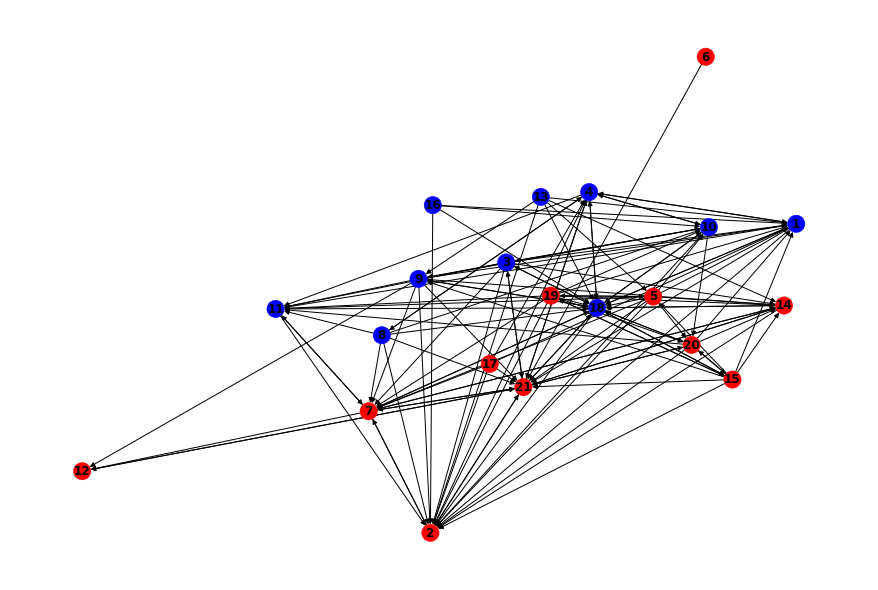

In [163]:
color_map = []
for node in G_las:
    if node in node_groups[0]:
        color_map.append('blue')
    else:
        color_map.append('red')  
#nx.draw(G, node_color=color_map, with_labels=True)
nx.draw(G_las,node_color=color_map, with_labels=True, font_weight='bold')
plt.show()

Betweenness centrality looks at all the shortest paths that pass through a particular node (see above)

In [157]:

import operator

betweenness_dict = nx.betweenness_centrality(G_las) # Run betweenness 
nx.set_node_attributes(G_las, betweenness_dict, 'betweenness')

sorted_betweenness = sorted(betweenness_dict.items(), key=operator.itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness :")
for b in sorted_betweenness[:20]:
    print(b)

    

Top 20 nodes by betweenness :
(18, 0.23114348370927315)
(21, 0.17634085213032577)
(15, 0.09243421052631579)
(4, 0.07048245614035088)
(7, 0.04813596491228069)
(1, 0.0350219298245614)
(20, 0.028706140350877186)
(10, 0.018421052631578942)
(3, 0.01833333333333333)
(9, 0.01094611528822055)
(2, 0.010529448621553883)
(5, 0.008555764411027568)
(11, 0.003684210526315789)
(19, 0.00243734335839599)
(14, 0.002196115288220551)
(8, 0.0005263157894736842)
(6, 0.0)
(12, 0.0)
(13, 0.0)
(16, 0.0)


In [164]:
#M. Girvan and M. E. J. Newman

####